In [1]:
%load_ext autoreload
import ddls

Check that can import and use simulator module.

Create job

In [2]:
%autoreload
from ddls.demands.jobs.job import Job

job = Job(job_id=0,
          num_layers=24,
          num_dims_per_layer=768,
          weight_size=4,
          num_weights=int(125e6), # 125M weights
          batch_size=int(0.5e6), # 0.5M batch size
          num_samples=int(300e9), # 300B tokens
          sample_size=150, # 45TB / 300B -> 150 Bytes per sample
          num_epochs=0.6) # use 300B of 410+19+12+55+3=499B tokens -> 0.6 epochs
print(job)

Job ID: 0 | Job type: DNN | Per-weight memory: 4 | # weights: 1.250e+08 | Model memory: 5.000e+08 | # layers: 24 | Per-layer # dims: 768 | Batch size: 500000 | Per-sample memory: 150 | # samples: 3.000e+11 | Data set size: 4.500e+13 | # epochs: 0.6


Create data parallel workloads frmo job

In [3]:
%autoreload
from ddls.demands.jobs.job import Job
from ddls.demands.workloads.data_parallel_workload import DataParallelWorkload

job = Job(job_id=0,
          num_layers=24,
          num_dims_per_layer=768,
          weight_size=4,
          num_weights=int(125e6),
          batch_size=int(0.5e6),
          num_samples=int(300e9),
          sample_size=150,
          num_epochs=0.6)
print(job)

num_devices = 1000
local_batch_size = int(job.batch_size / num_devices)
workloads = [DataParallelWorkload(workload_id=i, job=job, local_batch_size=local_batch_size) for i in range(num_devices)]
for workload in workloads:
    print(workload)

Job ID: 0 | Job type: DNN | Per-weight memory: 4 | # weights: 1.250e+08 | Model memory: 5.000e+08 | # layers: 24 | Per-layer # dims: 768 | Batch size: 500000 | Per-sample memory: 150 | # samples: 3.000e+11 | Data set size: 4.500e+13 | # epochs: 0.6
Workload ID: 0 | Local batch size: 500 | Total workload memory size: 5.001e+08 | Parent job ID: 0
Workload ID: 1 | Local batch size: 500 | Total workload memory size: 5.001e+08 | Parent job ID: 0
Workload ID: 2 | Local batch size: 500 | Total workload memory size: 5.001e+08 | Parent job ID: 0
Workload ID: 3 | Local batch size: 500 | Total workload memory size: 5.001e+08 | Parent job ID: 0
Workload ID: 4 | Local batch size: 500 | Total workload memory size: 5.001e+08 | Parent job ID: 0
Workload ID: 5 | Local batch size: 500 | Total workload memory size: 5.001e+08 | Parent job ID: 0
Workload ID: 6 | Local batch size: 500 | Total workload memory size: 5.001e+08 | Parent job ID: 0
Workload ID: 7 | Local batch size: 500 | Total workload memory si

Workload ID: 988 | Local batch size: 500 | Total workload memory size: 5.001e+08 | Parent job ID: 0
Workload ID: 989 | Local batch size: 500 | Total workload memory size: 5.001e+08 | Parent job ID: 0
Workload ID: 990 | Local batch size: 500 | Total workload memory size: 5.001e+08 | Parent job ID: 0
Workload ID: 991 | Local batch size: 500 | Total workload memory size: 5.001e+08 | Parent job ID: 0
Workload ID: 992 | Local batch size: 500 | Total workload memory size: 5.001e+08 | Parent job ID: 0
Workload ID: 993 | Local batch size: 500 | Total workload memory size: 5.001e+08 | Parent job ID: 0
Workload ID: 994 | Local batch size: 500 | Total workload memory size: 5.001e+08 | Parent job ID: 0
Workload ID: 995 | Local batch size: 500 | Total workload memory size: 5.001e+08 | Parent job ID: 0
Workload ID: 996 | Local batch size: 500 | Total workload memory size: 5.001e+08 | Parent job ID: 0
Workload ID: 997 | Local batch size: 500 | Total workload memory size: 5.001e+08 | Parent job ID: 0


Mount workloads onto processor

In [4]:
%autoreload
from ddls.devices.processors.gpu import GPU
from ddls.demands.jobs.job import Job
from ddls.demands.workloads.data_parallel_workload import DataParallelWorkload

# initialise the GPU
num_devices = 1000
devices = [GPU(device_id=i, num_streaming_multiprocessors=8) for i in range(num_devices)]

# initialise a job similar to the small GPT-3 model
job = Job(job_id=0,
          num_layers=10,
          num_dims_per_layer=64,
          weight_size=4,
          num_weights=int(10e3),
          batch_size=int(0.1e6),
          num_samples=int(300e6),
          sample_size=150,
          num_epochs=0.6)
print(job)

# split the job into data parallel workloads ready to be mounted onto a cluster
local_batch_size = int(job.batch_size / num_devices)
workloads = [DataParallelWorkload(workload_id=i, job=job, local_batch_size=local_batch_size) for i in range(num_devices)]
    
# mount the workloads onto the devices
for workload, device in zip(workloads, devices):
    device.mount(workload)
    print(f'Device ID {device.device_id} mounted with workload ID {workload.workload_id} -> Run time: {workload.get_run_time(device)} s')

Job ID: 0 | Job type: DNN | Per-weight memory: 4 | # weights: 1.000e+04 | Model memory: 4.000e+04 | # layers: 10 | Per-layer # dims: 64 | Batch size: 100000 | Per-sample memory: 150 | # samples: 3.000e+08 | Data set size: 4.500e+10 | # epochs: 0.6
Device ID 0 mounted with workload ID 0 -> Run time: 0.07074137632324656 s
Device ID 1 mounted with workload ID 1 -> Run time: 0.07074137632324656 s
Device ID 2 mounted with workload ID 2 -> Run time: 0.07074137632324656 s
Device ID 3 mounted with workload ID 3 -> Run time: 0.07074137632324656 s
Device ID 4 mounted with workload ID 4 -> Run time: 0.07074137632324656 s
Device ID 5 mounted with workload ID 5 -> Run time: 0.07074137632324656 s
Device ID 6 mounted with workload ID 6 -> Run time: 0.07074137632324656 s
Device ID 7 mounted with workload ID 7 -> Run time: 0.07074137632324656 s
Device ID 8 mounted with workload ID 8 -> Run time: 0.07074137632324656 s
Device ID 9 mounted with workload ID 9 -> Run time: 0.07074137632324656 s
Device ID 10

Create a topology

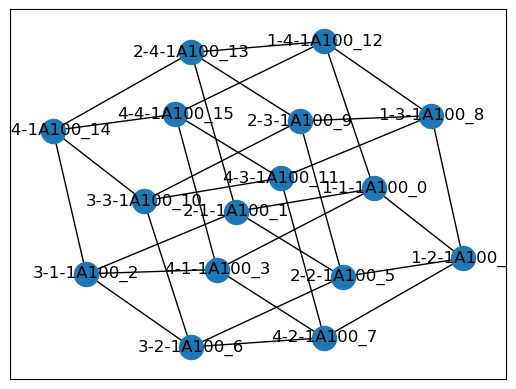

In [5]:
%autoreload
from ddls.topologies.torus import Torus

# init topology
topology = Torus(x_dims=4, y_dims=4)

# populate nodes with A100 devices 
for i, node in enumerate(topology.topology.nodes):
    topology.topology.nodes[node]['device'] = GPU(device_id=i, device_type='A100', num_streaming_multiprocessors=8)
    
# display topology
topology.render()

Run a job on a cluster.

In [12]:
%autoreload
from ddls.topologies.torus import Torus
from ddls.managers.schedulers.srpt import SRPT
from ddls.managers.placers.random_placer import RandomPlacer
from ddls.demands.jobs.job import Job
from ddls.clusters.cluster import Cluster

topology = Torus(x_dims=4, y_dims=4)
for i, node in enumerate(topology.topology.nodes):
    topology.topology.nodes[node]['device'] = GPU(device_id=i, device_type='A100', num_streaming_multiprocessors=8)

scheduler = SRPT()

placer = RandomPlacer()

jobs = [Job(job_id=0,
          num_layers=24,
          num_dims_per_layer=768,
          weight_size=4,
          num_weights=int(1e6),
          batch_size=int(100e3),
          num_samples=int(300e6),
          sample_size=150,
          num_epochs=0.6)
        for job in range(100)]

cluster = Cluster(topology=topology,
                  scheduler=scheduler,
                  placer=placer)

cluster.reset()
cluster.run(mode='time_driven',
            jobs=jobs)

t=0
t=1
t=2
t=3
t=4
t=5
t=6
t=7
t=8
t=9
t=10
t=11
t=12
t=13
t=14
t=15
t=16
t=17
t=18
t=19
t=20
t=21
t=22
t=23
t=24
t=25
t=26
t=27
t=28
t=29
t=30
t=31


Exception: Trying to allocate 4937500 of memory but have only 1312500 available.